# Standard Risk and Performance Measures
A portfolio's performance is typically assessed using its return over time. Key measures derived from this include:
Return  = Profit
Volatile = variation , opp/ned 
Avg returns not a good way to understand how assets behave. Does not capture enough 

$$
R_{t,t+1} = (P_{t+1} - P_t )/ P_t 
$$
Retuns 
0.2 / 20% , 1.2 120% 

Utbytte: Burde altid legges inn, called Med dividend = "total return". Price return = uten dividend. 


## Multi period returns: 
$$
R_{R,t+2} = (1 + R_{t,t+1})(1+R_{t+1,t+2}) -1 
$$
* Compound over 2 periods 

$$
(1+0.10)(1-0.03)-1 = 0.067 = 6.70%
$$
* Askje gir 10% profit dag 1 , 3% profit dag 2. 

$$
(1+0.1)(1-0.1)-1 = -0.01 , -1%
$$
* Mandag:     Inngang close price mandag <null> 
*  Tirsdag:    Askje stiger 10% ifht close mandag <opp>
*  Onsdag:     Prias synker 10 %  ifht close tirsdag <ned>

In [1]:
import numpy as np
import pandas as pd

prices_a = [8.7, 9.1, 8.5, 9.0]
8.7/9.1 -1

prices_a[1:]
prices_a[:-1]

priser = pd.DataFrame({
                        "Blue": [8.7, 9.1, 8.5, 9.0,12.1],

                        "Red":[7.5, 7.9, 8.0, 8.3, 5.3]
                    })
priser

,Blue,Red
0,8.7,7.5
1,9.1,7.9
2,8.5,8.0
3,9.0,8.3
4,12.1,5.3


In [2]:
print(priser.iloc[1:])
print(priser.iloc[:-1])
priser.shift(1)

   Blue  Red
1   9.1  7.9
2   8.5  8.0
3   9.0  8.3
4  12.1  5.3
   Blue  Red
0   8.7  7.5
1   9.1  7.9
2   8.5  8.0
3   9.0  8.3


,Blue,Red
0,NaN,NaN
1,8.7,7.5
2,9.1,7.9
3,8.5,8.0
4,9.0,8.3


In [3]:
print(priser/priser.shift(1)-1)
#ingen priser for dag 1 , n priser = n-1 returns.
priser.pct_change()


       Blue       Red
0       NaN       NaN
1  0.045977  0.053333
2 -0.065934  0.012658
3  0.058824  0.037500
4  0.344444 -0.361446


,Blue,Red
0,NaN,NaN
1,0.045977,0.053333
2,-0.065934,0.012658
3,0.058824,0.037500
4,0.344444,-0.361446


        Blue        Red
0        NaN        NaN
1   1.490024   0.338295
2   0.823085   2.062035
3   0.514123   0.389139
4   0.904778   0.669561
5   0.244696   0.162133
6   3.984854  15.141407
7   2.542342   2.092723
8   0.112755   0.964867
9   8.328873   0.225199
10  0.900909   1.641906
11  1.281066   2.951854
12  0.328508   0.784099
13  0.661731   0.283515
14  1.491559   2.553215
15  2.883658   1.113372
16  0.390709   0.377247
17  1.943162   1.543515
18  0.823636   0.994430
19  0.929577   2.302986


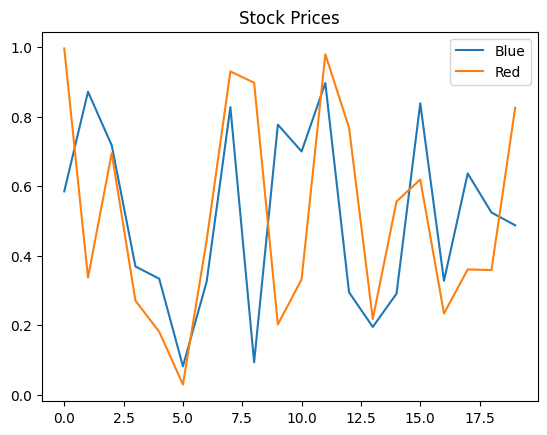

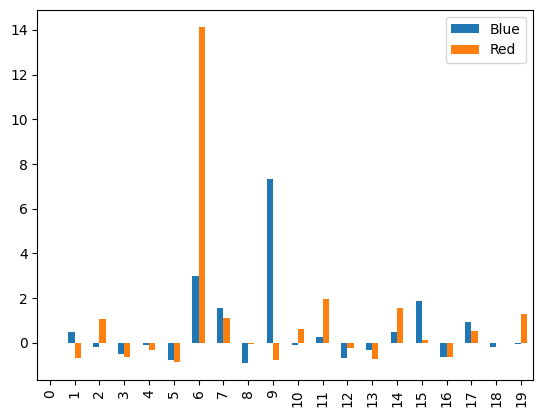

In [4]:
import numpy as np
import pandas as pd

# Generate a DataFrame with 2 columns and 20 rows of random numbers
random_data = pd.DataFrame(np.random.rand(20, 2), columns=['Blue', 'Red'])
#print(random_data)
returns = random_data.pct_change()
random_data.plot(title="Stock Prices")
returns.plot.bar()
#print(returns.std())
#print(returns.mean())

print(returns + 1)
#Kompounding is just this returns plus 1 format , need to subtract 1 , .prod  - 1 



## How to compere returns across periods of time 
### Annualizing returs
The return you would get if the return you are looking at would continue. 
$$
((1+0.01)^{12}-1)
$$

In [5]:
#Askje stiger 1% over 3mnd (ett kvartal) , Hva er annualisert vekst/profitt. 
#12/3 = 4
((1+0.01)**(4)-1)

#Monthly 
rm = 0.01
((1+rm)**12-1)*100

#Quarterly
rq = 0.04
((1+rq)**4-1)*100

#Daily
rd = 0.001
((1+rd)**252-1)*100

28.643404437615217

### Volatility:
This is the standard deviation of the portfolio's return and serves as the most basic measure of risk. It is calculated as 

$$
√(wᵀΣw) 
$$ 
where Σ is the covariance matrix of the assets' returns.

The square of the volatility, known as variance, is also commonly used as a risk proxy.

* Population Variance 
$$
\sigma^2 = \frac{\sum_{i=1}^{N}(X_i - \mu)^2}{N}
$$

* Sample variance 
$$
s^2 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}
$$


* Population standard deviation
$$
\sigma = \sqrt{\frac{\sum_{i=1}^{N}(X_i - \mu)^2}{N}}
$$

* Sample standard deviation 
$$
s = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}}
$$

We compute the average of the square of the deviations from the mean. Måle varians. Deviation from the mean , squared to get positiv. 


### Annulzaing volatility: 
We cant compare the volatility from daily data with the volataolity ofrom the monthly data. 
Multiple the daily data by the days of the year (252)
$$
\sigma_{ann} = \sigma_p \sqrt{p}
$$

 Prosjektering , svingenger blir større se på som lys nærme og lenger vekk , spredning. 



In [6]:
random_data_2 = pd.DataFrame(np.random.rand(20, 2), columns=['Blue', 'Red'])
returns = random_data_2.pct_change()
print(returns)
returns = returns.dropna()
print(returns)

          Blue         Red
0          NaN         NaN
1     0.120006    0.582702
2     1.120956   -0.533239
3     0.953895   -0.436430
4    -0.643511    2.045753
5    -0.605634   -0.921122
6     1.941424   15.020389
7     1.173487    0.057539
8    -0.485824   -0.313785
9    -0.200042   -0.994771
10    1.659456  170.755124
11   -0.024616   -0.831093
12   -0.345321   -0.961270
13    0.566393  125.960518
14   -0.002832   -0.653283
15   -0.437496    3.044787
16   -0.657675   -0.924667
17   -0.994129    4.898972
18  286.569569    1.998756
19   -0.450535   -0.558212
          Blue         Red
1     0.120006    0.582702
2     1.120956   -0.533239
3     0.953895   -0.436430
4    -0.643511    2.045753
5    -0.605634   -0.921122
6     1.941424   15.020389
7     1.173487    0.057539
8    -0.485824   -0.313785
9    -0.200042   -0.994771
10    1.659456  170.755124
11   -0.024616   -0.831093
12   -0.345321   -0.961270
13    0.566393  125.960518
14   -0.002832   -0.653283
15   -0.437496    3.044787
1

In [7]:
returns.std() # Sample 
derivations = returns - returns.mean()
print(derivations)
derivations_squared = derivations**2
print(derivations_squared)
variance = derivations_squared.mean()
print(variance) 
volatility = np.sqrt(variance) #Population 
print(volatility)

          Blue         Red
1   -15.104076  -16.113964
2   -14.103127  -17.229906
3   -14.270188  -17.133097
4   -15.867594  -14.650914
5   -15.829716  -17.617789
6   -13.282658   -1.676278
7   -14.050596  -16.639128
8   -15.709907  -17.010452
9   -15.424125  -17.691438
10  -13.564627  154.058457
11  -15.248699  -17.527760
12  -15.569403  -17.657936
13  -14.657689  109.263851
14  -15.226914  -17.349950
15  -15.661579  -13.651880
16  -15.881758  -17.621334
17  -16.218212  -11.797695
18  271.345486  -14.697911
19  -15.674618  -17.254879
            Blue           Red
1     228.133123    259.659850
2     198.898181    296.869655
3     203.638268    293.543004
4     251.780536    214.649270
5     250.579923    310.386474
6     176.429012      2.809908
7     197.419237    276.860576
8     246.801172    289.355462
9     237.903633    312.986963
10    183.999108  23734.008258
11    232.522818    307.222360
12    242.406320    311.802712
13    214.847857  11938.589157
14    231.858914    301.02

In [8]:
num_of_observations = returns.shape[0]
print(num_of_observations)
volatility = variance**0.5
print(volatility)


19
Blue    63.962090
Red     45.882914
dtype: float64


### Sharpe Ratio (SR):
Proposed by William Sharpe, this is a widely used risk-adjusted performance measure. It calculates the excess return of a portfolio over a risk-free rate, per unit of risk (volatility): 
$$
SR = (wᵀμ - r_f) / √(wᵀΣw).
$$

Annulaized small cap higher volatillity 
Annulized large cap lower volataolit 
 Return / Risk -> Dårlig måte å gjøre det på , look at excess return  over the risk free rate. 

$$
\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
$$
* R_p: This is the expected return of the portfolio or investment.

* R_f: This is the risk-free rate of return. This is the theoretical return of an investment with zero risk, often represented by the yield on a government treasury bill.

* sigma_p (sigma p): This is the standard deviation of the portfolio's return, which is the measure of its volatility or risk.

Once you adjust for risk free rate , you get a better udnerstanding. 

In [9]:

import pandas as pd
returns = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                      
                      header=0,
                      index_col=0,
                      parse_dates=True)

returns.head()






C:\Users\2r\AppData\Local\Temp\ipykernel_41812\1439117876.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  returns = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


Lo 10    0.106288
Hi 10    0.053900
dtype: float64
Number of months: 1110
Average monthly return:
Lo 10    0.012986
Hi 10    0.007423
dtype: float64

Annualized return (Method 1 - from monthly average):
Lo 10    0.167463
Hi 10    0.092810
dtype: float64

Total return over 92.5 years:
Lo 10    1.659582e+06
Hi 10    3.674948e+03
dtype: float64

Annualized return (Method 2 - direct):
Lo 10    0.167463
Hi 10    0.092810
dtype: float64


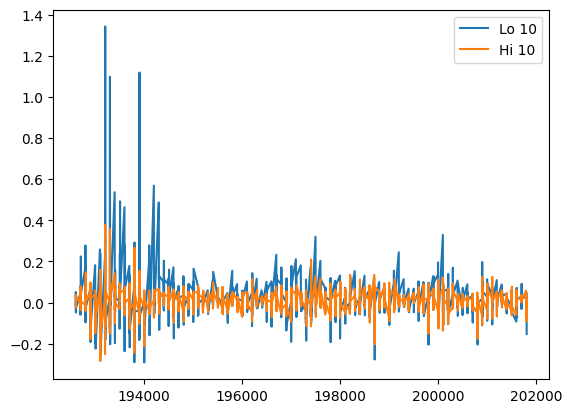

In [10]:
import numpy as np 
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

#% to raw numbers 

returns = returns/100
returns.head()
returns.plot(legend=True)

print(returns.std()) # standard deviation
ann_vol = returns.std()*np.sqrt(12)

# Let's check how many months we have
n_months = returns.shape[0]
print(f"Number of months: {n_months}")

# CORRECTED: Geometric mean return per month 
# This should be: (final_value/initial_value)^(1/n_periods) - 1
# Which is equivalent to: ((1+r1)*(1+r2)*...*(1+rn))^(1/n) - 1
return_per_month = (returns + 1).prod()**(1/n_months) - 1 
print(f"Average monthly return:")
print(return_per_month)

# CORRECTED: Annualized return calculation
# Method 1: From monthly geometric average
annualized_return_method1 = (1 + return_per_month)**12 - 1
print(f"\nAnnualized return (Method 1 - from monthly average):")
print(annualized_return_method1)

# Method 2: Direct calculation from total period
# Total return over the entire period, then annualize
total_return = (returns + 1).prod() - 1
years = n_months / 12
annualized_return_method2 = (1 + total_return)**(1/years) - 1
print(f"\nTotal return over {years:.1f} years:")
print(total_return)
print(f"\nAnnualized return (Method 2 - direct):")
print(annualized_return_method2)

In [11]:
annualized_return = (returns + 1).prod()**(12/n_months) - 1
annualized_return

annualized_vol = returns.std() * np.sqrt(12)
annualized_return/annualized_vol


Lo 10    0.454825
Hi 10    0.497063
dtype: float64

In [12]:
# Display results in percentage format for better readability
print("=== PORTFOLIO PERFORMANCE SUMMARY ===")
print(f"Analysis period: {n_months} months ({n_months/12:.1f} years)")
print(f"Data frequency: Monthly")
print()

print("ANNUALIZED RETURNS:")
print(f"Lo 10 (Small Cap): {annualized_return_method2['Lo 10']*100:.3f}%")
print(f"Hi 10 (Large Cap): {annualized_return_method2['Hi 10']*100:.3f}%")
print()

print("ANNUALIZED VOLATILITY:")
print(f"Lo 10 (Small Cap): {ann_vol['Lo 10']*100:.3f}%")
print(f"Hi 10 (Large Cap): {ann_vol['Hi 10']*100:.3f}%")
print()

print("SHARPE RATIOS (assuming 0% risk-free rate):")
sharpe_ratios = annualized_return_method2 / ann_vol
print(f"Lo 10 (Small Cap): {sharpe_ratios['Lo 10']:.4f}")
print(f"Hi 10 (Large Cap): {sharpe_ratios['Hi 10']:.4f}")
print()

print("TOTAL CUMULATIVE RETURNS (over entire period):")
print(f"Lo 10 (Small Cap): {total_return['Lo 10']*100:.2f}%")
print(f"Hi 10 (Large Cap): {total_return['Hi 10']*100:.2f}%")

=== PORTFOLIO PERFORMANCE SUMMARY ===
Analysis period: 1110 months (92.5 years)
Data frequency: Monthly

ANNUALIZED RETURNS:
Lo 10 (Small Cap): 16.746%
Hi 10 (Large Cap): 9.281%

ANNUALIZED VOLATILITY:
Lo 10 (Small Cap): 36.819%
Hi 10 (Large Cap): 18.672%

SHARPE RATIOS (assuming 0% risk-free rate):
Lo 10 (Small Cap): 0.4548
Hi 10 (Large Cap): 0.4971

TOTAL CUMULATIVE RETURNS (over entire period):
Lo 10 (Small Cap): 165958186.63%
Hi 10 (Large Cap): 367494.81%


In [13]:
riskfree_rate = 0.03
excess_return = annualized_return_method2 - riskfree_rate
sharpe_ratios = excess_return / ann_vol
print(sharpe_ratios)
#Timeseries of risk-free rate is what you should calculate the Sharpe ratio against
timeseries_riskfree = pd.Series(riskfree_rate, index=returns.index)
# Calculate the Sharpe ratio
sharpe_ratios = (returns.mean() - timeseries_riskfree.mean()) / returns.std()
sharpe_ratios

Lo 10    0.373346
Hi 10    0.336392
dtype: float64


Lo 10   -0.116687
Hi 10   -0.392024
dtype: float64

### Beyond Normality: Higher-Order Moments and Downside Risk

Financial data often exhibits characteristics like asymmetry (skewness) and heavy tails (kurtosis), which means asset returns are not normally distributed. In such cases, relying solely on mean and variance can be insufficient for proper risk assessment.
Higher-Order Moments
To address non-normal returns, it is reasonable to incorporate higher-order moments into portfolio analysis:
### Skewness: 
This is the third central moment and measures the asymmetry of the return distribution. Investors generally prefer higher (positive) skewness.
### Kurtosis: 
This is the fourth central moment and measures the thickness of the distribution's tails. Investors prefer lower kurtosis, as high kurtosis indicates a greater potential for extreme outcomes (outliers).

## Downside Risk Measures
Since investors are typically more concerned with losses than with unexpected gains, downside risk measures offer a more relevant assessment of risk than variance, which penalises positive and negative deviations from the mean equally.
Key downside and tail risk measures include:
### Semi-Variance: 
First considered by Markowitz, this measure only accounts for returns that fall below the mean, thus capturing only the "undesired" risk.
### Value-at-Risk (VaR):
 A popular tail risk measure, VaR quantifies the maximum potential loss over a specific period with a given confidence level (e.g., 95%). It essentially identifies the quantile of the loss distribution. However, VaR does not provide information about the potential magnitude of losses beyond this threshold and is not a coherent risk measure because it lacks subadditivity.
### Conditional Value-at-Risk (CVaR):
 Also known as Expected Shortfall (ES), CVaR improves upon VaR by calculating the expected value of losses that exceed the VaR threshold. It considers the shape of the tail and is a coherent risk measure, satisfying properties like subadditivity which are crucial for diversification.

These alternative measures can be incorporated into portfolio optimization formulations, providing sophisticated alternatives to the original mean-variance approach.


# Measuring Max Drawdown

Volatility is not necessarily a bad thing , moves up and down , deviating up is not a bad thing. 

Risk as the possibility of loosing money 

Max drawdown is the maximum loss that you could have expcerice, buying at ATH selling at ATL, big yikes. Measures only down, not up. Volatility measures both up and down. 
Worst Case messure if you have the timing 100% wrong. 

## Computing Drawdowns 
Construct a hypotetical buy and hold investment in an asset. Wealth index hypotecical. 

Wealth index = ? 

Compute the prior peak at any point in time. Look at prior peaks(n). Draw down is the distance from those points to the next bottom. "Feeling of loss", consitant with behavioir biases that individuals are subject to. "WE HATE IT". 

# Maximum drawdowns 

Time series is a good way to show drawdowns to see how long it takes to recover from drawdowns. 


# Risk adjuystmets ratio using drawdown ? 
Kalmar ratio , trailing 36 month drawdown , look at the return in the numerator. 


# Problems with drawdown 
Dependent on 2 data points -> Sensetive 
Drawdown on dailty vs drawdown weekly very different. Worst case dissapears in bigger timeframes , sensetive to granualiry of the data. 

Better measures for worst case scenarios: VAR , CVAR. 
# Measuring Maximum Drawdown

### What is Maximum Drawdown?:
**Maximum Drawdown (MDD)** is the largest single drop in an investment's value from a peak to a subsequent trough. It is expressed as a percentage of the peak value and serves as a "worst-case" indicator of downside risk over a specific period. Unlike volatility, which measures both gains and losses, MDD exclusively quantifies the most significant loss.

### How to Calculate Drawdowns:
The calculation involves tracking a portfolio's value over time, identifying its high points, and measuring the decline from those high points.

* **Wealth Index ($W_t$)**
We first compute a wealth index to track the cumulative growth of an initial investment (e.g., $1).
$$
W_t = W_{t-1} \times (1 + R_t)
$$
where $W_0 = 1$ and $R_t$ is the return in period $t$.

* **Previous Peak ($P_t$)**
Next, we track the running maximum of the wealth index, often called the "high-water mark."
$$
P_t = \max(W_0, W_1, ..., W_t)
$$

* **Drawdown ($D_t$)**
The drawdown at any time $t$ is the percentage loss from the last peak.
$$
D_t = \frac{W_t - P_t}{P_t}
$$
The **Maximum Drawdown** is the minimum value (i.e., the largest loss) observed in the series $D_t$.

### Using MDD in Risk-Adjusted Ratios:
MDD is a critical input for risk-adjusted performance metrics that focus on downside risk, such as the **Calmar Ratio**.

* **Calmar Ratio**
This ratio measures the compound annualized return relative to the maximum drawdown. A higher ratio indicates better performance for the amount of downside risk taken.
$$
\text{Calmar Ratio} = \frac{\text{Compound Annual Growth Rate (CAGR)}}{|\text{Maximum Drawdown}|}
$$

### Limitations of Maximum Drawdown:
* **Sensitivity to Two Data Points:** The entire metric is determined by a single peak and a single trough. An anomalous, short-lived price movement can skew the MDD, making it unrepresentative of the asset's typical risk profile.

* **Dependence on Data Frequency:** The calculated MDD changes significantly with the frequency of the data (daily, weekly, monthly). Daily data captures more volatility and will almost always show a larger MDD than weekly or monthly data, making comparisons between assets difficult unless the data frequency is standardized.



C:\Users\2r\AppData\Local\Temp\ipykernel_41812\1805383261.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  me_m = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv', index_col=0, parse_dates=True, na_values=-99.99, date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))


<Axes: >

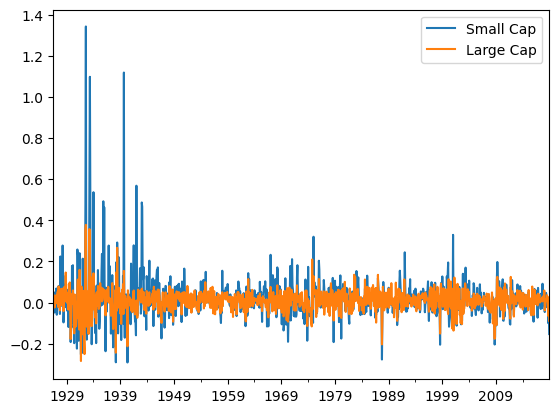

In [14]:
#Computing Drawdowns 
me_m = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv', index_col=0, parse_dates=True, na_values=-99.99, date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))

rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['Small Cap', 'Large Cap']
rets = rets / 100
rets.plot.line()





<Axes: >

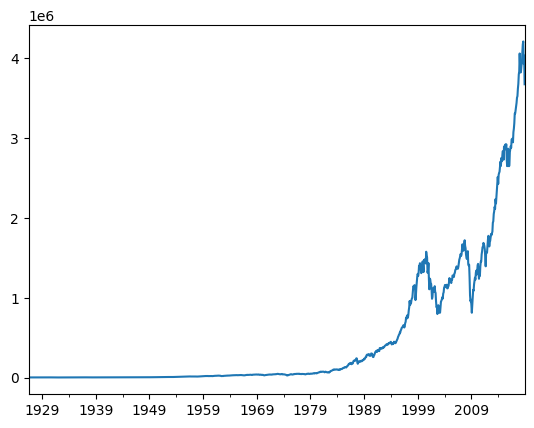

In [15]:
#1 Compute wealth index 
#2 Compute previous peaks 
#3 Compute drawdown - which is the wealth value as a precentage of the previous peak


#1. Wealth index
wealth_index = 1000*(1+rets["Large Cap"]).cumprod() 
wealth_index.head()
wealth_index.plot.line()




<Axes: >

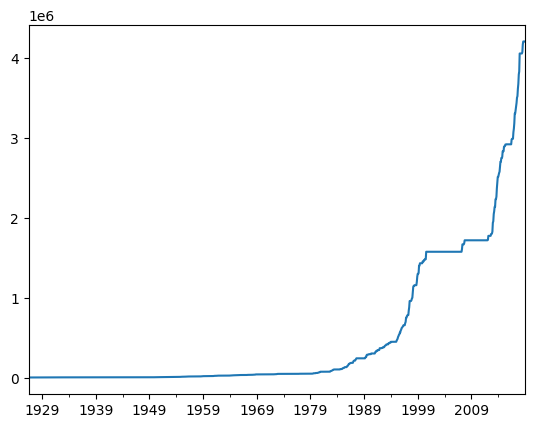

In [16]:
        #2. Previous peaks 
previous_peaks = wealth_index.cummax() #Addatative
previous_peaks.head()
previous_peaks.plot.line()


<Axes: >

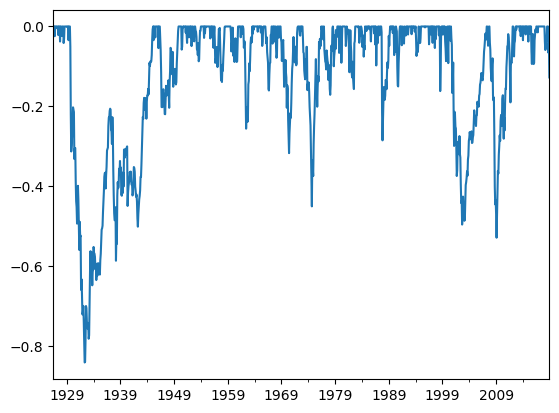

In [17]:
# 3. Drawdown
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.head()
drawdown.plot.line()

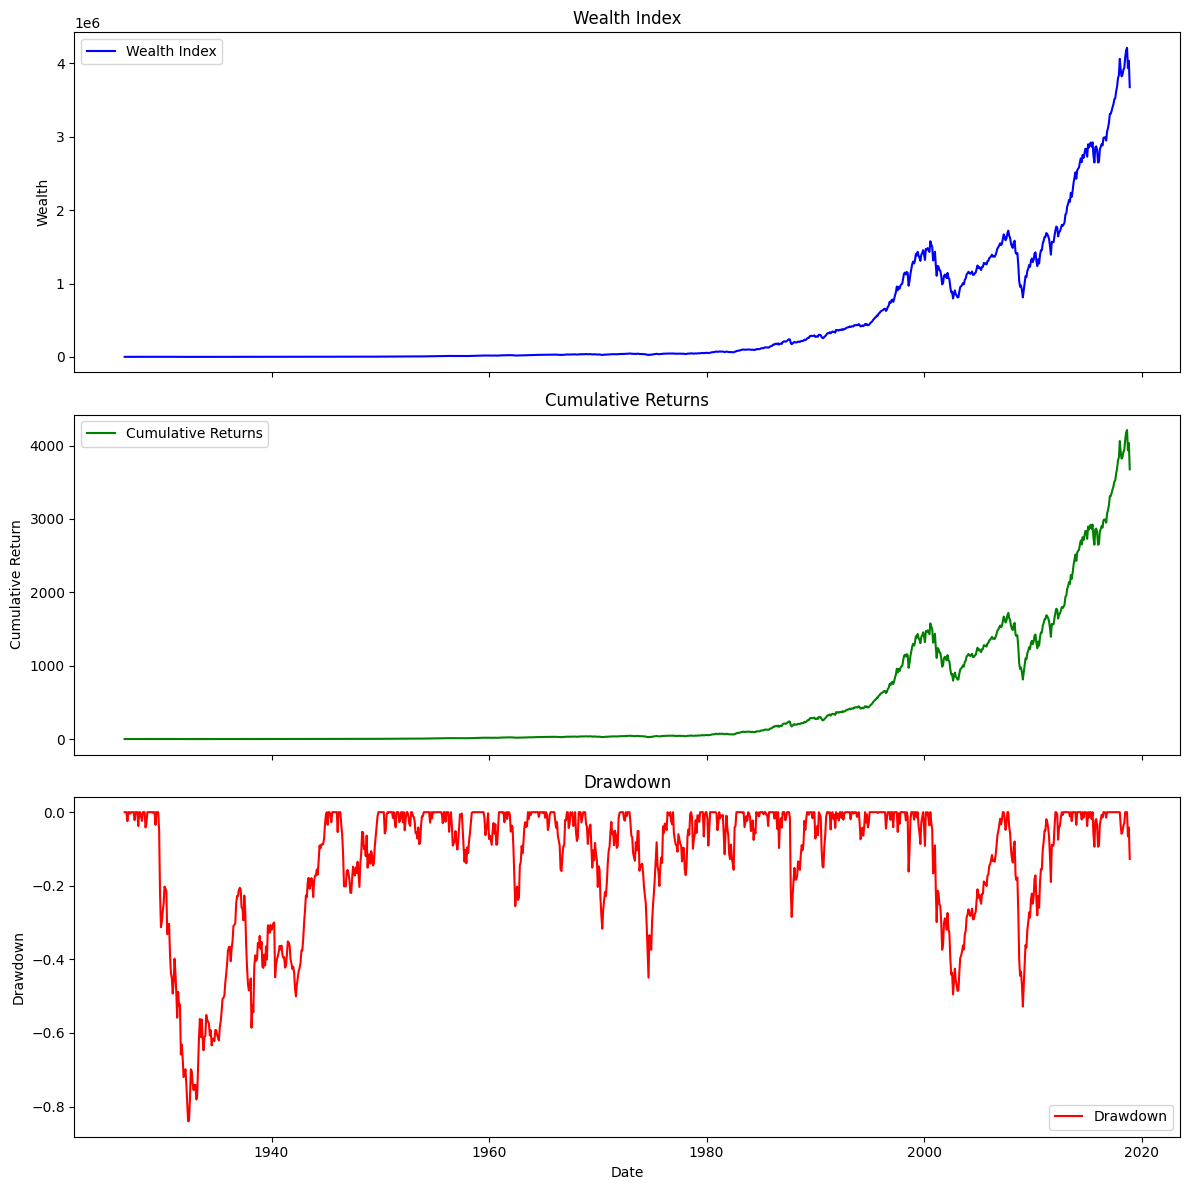

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot wealth index
ax[0].plot(wealth_index, label="Wealth Index", color="blue")
ax[0].set_title("Wealth Index")
ax[0].set_ylabel("Wealth")
ax[0].legend()

# Plot cumulative returns
cumulative_returns = (1 + rets["Large Cap"]).cumprod()
ax[1].plot(cumulative_returns, label="Cumulative Returns", color="green")
ax[1].set_title("Cumulative Returns")
ax[1].set_ylabel("Cumulative Return")
ax[1].legend()

# Plot drawdown
ax[2].plot(drawdown, label="Drawdown", color="red")
ax[2].set_title("Drawdown")
ax[2].set_ylabel("Drawdown")
ax[2].set_xlabel("Date")
ax[2].legend()

plt.tight_layout()
plt.show()

In [19]:
print(drawdown.min())
print(drawdown.idxmin())
print(drawdown["1975":].idxmin())




-0.8400375277943123
1932-05-01 00:00:00
2009-02-01 00:00:00


In [20]:
def drawdown(returns_series: pd.Series):
    """
    Takes input of a panda time series
    Computes and returns a dataframe that contains: 
    1. Wealth index
    2. The previous peaks
    3. Percent drawdowns
    """
    wealth_index = 1000*(1+returns_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({
        "Wealth Index": wealth_index,
        "Previous Peaks": previous_peaks,
        "Percent Drawdowns": drawdowns
    })
drawdown(rets["Small Cap"]).head()

,Wealth Index,Previous Peaks,Percent Drawdowns
1926-07-01,985.500000,985.500000,0.000000
1926-08-01,1035.957600,1035.957600,0.000000
1926-09-01,1045.592006,1045.592006,0.000000
1926-10-01,994.985353,1045.592006,-0.048400
1926-11-01,987.224467,1045.592006,-0.055822


<Axes: >

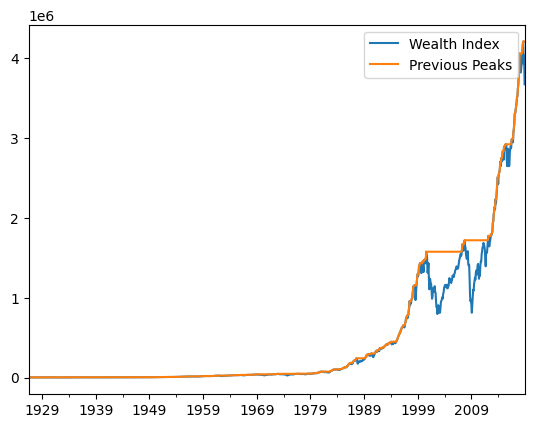

In [21]:
drawdown(rets["Large Cap"])[["Wealth Index","Previous Peaks"]]
drawdown(rets["Large Cap"])[["Wealth Index","Previous Peaks"]].plot()

<Axes: >

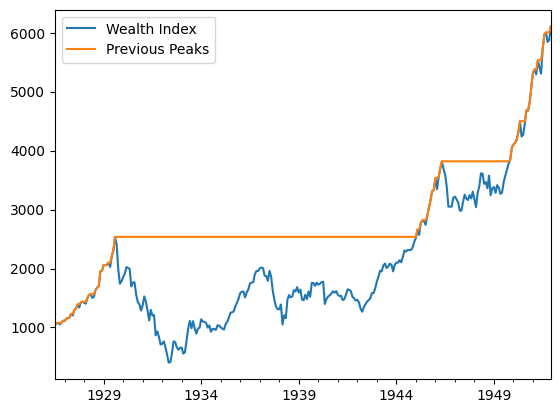

In [22]:
drawdown(rets[:"1951"]["Large Cap"])[["Wealth Index","Previous Peaks"]].plot()

In [23]:
drawdown(rets["Large Cap"])["Percent Drawdowns"].min()

np.float64(-0.8400375277943123)

### The Problem with the Normal Distribution:
While the normal (or Gaussian) distribution is a common starting point in finance, it's often a poor description of actual asset returns. The key issue is that in real markets, **extreme events (both large gains and large losses) occur far more frequently** than the normal distribution would predict.

Assuming normality is costly because it leads to a significant underestimation of risk. The probability of a sudden, massive loss (a "tail event") is much higher in reality. To properly analyze returns, we must look beyond mean and variance and use higher-order moments.

### Skewness: Measuring Asymmetry:
Skewness is the **third standardized moment** of a distribution. It measures the degree of asymmetry of returns around their mean. A normal distribution has a skewness of 0.

![A visual representation of skewness in a distribution](fin_img/skeded.jpg)

* **Negative Skew (Left-Skewed):** The distribution has a long tail on the left side. This is common and indicates a tendency for frequent small gains and a few very large losses.
* **Positive Skew (Right-Skewed):** The distribution has a long tail on the right. This indicates frequent small losses and a few extreme gains, a more desirable "lottery-like" payoff structure.

The formula for the skewness of a sample is:
$$
S = \frac{\frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^3}{(\frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^2)^{3/2}}
$$

### Kurtosis: Measuring "Fat Tails":
Kurtosis is the **fourth standardized moment** and measures the "tailedness" of a distribution, indicating the likelihood of extreme outcomes. A normal distribution has a kurtosis of 3. In finance, we use **Excess Kurtosis**, which is simply `Kurtosis - 3`, to set the baseline for a normal distribution to 0.

* **Leptokurtic (Excess Kurtosis > 0):** The distribution has "fat tails" and a sharper peak. There is a higher probability of extreme events. Most asset returns are leptokurtic.
* **Mesokurtic (Excess Kurtosis = 0):** This is the characteristic of a normal distribution.
* **Platykurtic (Excess Kurtosis < 0):** The distribution has "thin tails," meaning extreme events are less likely than in a normal distribution.

The formula for the excess kurtosis of a sample is:
$$
K_{excess} = \frac{\frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^4}{(\frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^2)^2} - 3
$$

### Testing for Normality: The Jarque-Bera (JB) Test:
The Jarque-Bera test is a statistical check used to determine if a dataset shows evidence of non-normality. It combines a sample's skewness and excess kurtosis into a single test statistic.

* **Null Hypothesis ($H_0$):** The data is normally distributed (i.e., skewness is 0 and excess kurtosis is 0).
* **Interpretation:** The test produces a p-value. A low p-value (typically < 0.05) provides strong evidence to **reject the null hypothesis**, leading to the conclusion that the asset returns are not normally distributed.

The formula for the JB statistic is:
$$
JB = \frac{n}{6} \left( S^2 + \frac{(K_{excess})^2}{4} \right)
$$
This statistic follows a Chi-squared distribution with 2 degrees of freedom.

### The Problem with Symmetric Risk:
Standard deviation (volatility) is a symmetric measure of risk. It treats a 10% gain and a 10% loss as equally "risky" because they both deviate from the average. However, investors don't fear upside volatility; they fear the risk of losing money. Downside risk measures were developed to focus specifically on this, providing a more realistic view of potential losses.

### Semi-Deviation:
**Semi-deviation** is a measure of risk that only considers returns falling below a specified threshold, typically the average return or zero. Instead of calculating standard deviation on all data points, it truncates the distribution and calculates the volatility of **only the underperforming returns**.

* **Purpose:** It captures the volatility of the "bad" outcomes, which aligns better with an investor's perception of risk.
* **Limitation:** While it tells you how dispersed your losses are, it **doesn't tell you anything about the potential magnitude** or severity of the worst-case losses in the tail of the distribution.

### Value at Risk (VaR):
**Value at Risk (VaR)** is a statistical measure that quantifies the maximum potential loss for an investment over a specific time horizon, at a given confidence level. It answers the question: *"What is the most I can expect to lose over the next month with 95% confidence?"*
![Normal Distribution with VaR](fin_img/arfornorm.png)
* **How it Works:** A 95% VaR of $100,000 means that on 95 out of 100 days, you would not expect to lose more than $100,000. Conversely, it means there is a 5% chance that your loss will be **at least $100,000**.
* **The Major Flaw:** VaR tells you the threshold of a bad loss, but it tells you **nothing about what happens if you cross that threshold**. You're essentially throwing away the information in the tail. The loss could be $100,001 or it could be $1,000,000. VaR is blind to the severity of the worst-case scenarios.

### Conditional Value at Risk (CVaR):
**Conditional Value at Risk (CVaR)**, also known as **Expected Shortfall (ES)**, was designed to address the major flaw in VaR. It measures the *expected* loss once the VaR threshold has been breached. It answers the question: *"If I do have a bad day (i.e., I cross my VaR threshold), what is my average expected loss?"*

* **How it Works:** Following the example above, if the 95% VaR is $100,000, the CVaR might be $175,000. This means that in the worst 5% of cases, the **average loss** you can expect is $175,000.
* **Advantage:** CVaR gives a much better sense of the **magnitude of tail risk** and is considered a more comprehensive risk measure than VaR.

### Questions and Answers on VaR and CVaR:

**1. What is the key practical difference between VaR and CVaR, and why is CVaR often preferred for risk management?**

* **Answer:** The key difference is what they measure. **VaR** measures the **maximum loss at a certain probability threshold**, while **CVaR** measures the **average loss beyond that threshold**. CVaR is often preferred because it quantifies the *severity* of tail events, whereas VaR only marks the *start* of the tail and ignores how bad the losses can get. This makes CVaR a more conservative and informative measure for stress testing and understanding the true "worst-case" scenarios.

**2. Can a portfolio have a low VaR but still be extremely risky?**

* **Answer:** **Yes, absolutely.** This is a classic pitfall of relying only on VaR. A portfolio can have a very low VaR if it generates small, consistent gains most of the time but is exposed to a rare, catastrophic loss. For example, a strategy of selling naked call options on a stock. For 99% of the days, the stock stays flat and the strategy collects a small premium, resulting in a low 99% VaR. However, in the rare 1% of cases that the stock price explodes upwards, the losses are theoretically unlimited. VaR would fail to capture this catastrophic risk, while CVaR would be extremely high and correctly identify the danger.

In [24]:
# Clear the module from cache and reload it
import sys
import importlib

# Remove module from cache if it exists
if 'module_t' in sys.modules:
    del sys.modules['module_t']

# Now import fresh
import module_t as t

# Test both functions
print("Testing get_ffme_returns:")
ffme = t.get_ffme_returns()
print(ffme.head())

print("\nTesting get_hfi_returns:")
hfi = t.get_hfi_returns()
print(hfi.head())

import pandas as pd 
import module_t as t

hfi = t.get_hfi_returns()

Testing get_ffme_returns:


FileNotFoundError: [Errno 2] No such file or directory: 'data/Portfolios_Formed_on_ME_monthly_EW.csv'

In [ ]:
# Do these hedge funds produce somewhat normal returns ? 
#Measure skewness in kurtosis

pd.concat([hfi.mean(),hfi.median(), hfi.mean()>hfi.median()], axis = "columns")


,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


In [ ]:
#Skewness. 

t.skewness(hfi).sort_values()


Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [ ]:
import scipy.stats
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [ ]:
import numpy as np 


normal_rets = np.random.normal(0,.15, size=(26300, 1))
print(normal_rets)


[[-0.16048191]
 [ 0.21465038]
 [ 0.01670538]
 ...
 [ 0.03743147]
 [ 0.01872009]
 [ 0.1892042 ]]


In [ ]:
t.skewness(normal_rets)

np.float64(-0.007805133144207741)

In [ ]:
# Kurtosis 

t.kurtosis(normal_rets)



np.float64(3.0421704522058177)

In [ ]:
# The "wonky thing" - Force reload of module_t to pick up new functions
import sys
import importlib

# Remove from cache if it exists
if 'module_t' in sys.modules:
    del sys.modules['module_t']

# Import fresh
import module_t as t

print("Module reloaded! Available functions:")
print([func for func in dir(t) if not func.startswith('_')])

Module reloaded! Available functions:
['ann_to_inst', 'annualize_rets', 'annualize_vol', 'bond_cash_flows', 'bond_price', 'bond_total_return', 'bt_mix', 'cir', 'compound', 'cvar_historic', 'discount', 'drawdown', 'drawdown_allocator', 'fixedmix_allocator', 'floor_allocator', 'funding_ratio', 'gbm', 'get_ffme_returns', 'get_hfi_returns', 'get_ind_file', 'get_ind_nfirms', 'get_ind_returns', 'get_ind_size', 'get_total_market_index_returns', 'glidepath_allocator', 'gmv', 'inst_to_ann', 'is_normal', 'kurtosis', 'macaulay_duration', 'match_durations', 'math', 'minimize', 'minimize_vol', 'msr', 'norm', 'np', 'optimal_weights', 'pd', 'plot_ef', 'plot_ef2', 'portfolio_return', 'portfolio_vol', 'pv', 'run_cppi', 'scipy', 'semideviation', 'semideviation3', 'sharpe_ratio', 'skewness', 'summary_stats', 'terminal_stats', 'terminal_values', 'var_gaussian', 'var_historic']


c:\Master thesis\Skole_generelt\Skole_generelt\module_t.py:36: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if filetype is "returns":
c:\Master thesis\Skole_generelt\Skole_generelt\module_t.py:39: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  elif filetype is "nfirms":
c:\Master thesis\Skole_generelt\Skole_generelt\module_t.py:42: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  elif filetype is "size":


### Estimating VaR:
The primary challenge in estimating VaR is navigating the trade-off between **model risk** (assuming a specific distribution that may be incorrect) and **sample risk** (relying on a historical dataset that may not be representative of the future).

### Historical VaR:
This is the simplest, non-parametric method. It assumes that past performance is a good indicator of future risk. The process involves looking at a history of portfolio returns over a specific window (e.g., the last 252 days), ranking them from worst to best, and identifying the return that corresponds to your confidence level. For a 99% VaR on 1,000 historical returns, you would find the 10th worst return in the ranked list.

* **Pros:**
    * **No Model Risk:** It makes no assumptions about the shape of the return distribution. The data speaks for itself.
    * **Simplicity:** It's easy to calculate and understand.

* **Cons:**
    * **High Sample Risk:** The result is entirely dependent on the specific historical window used. If the recent past was unusually calm, the VaR estimate will be too low. It cannot account for events that did not occur in the sample period.

### Parametric (Gaussian) VaR:
Also known as the Variance-Covariance method, this approach assumes that portfolio returns follow a normal (Gaussian) distribution. This allows the entire distribution to be described by just two parameters: the **mean** ($\mu$) and the **standard deviation** ($\sigma$). To calculate VaR, you find the Z-score that corresponds to your desired confidence level on the standard normal distribution.

$$
VaR = \mu - (Z_{\alpha} \times \sigma)
$$
Where $Z_{\alpha}$ is the Z-score for the confidence level $\alpha$ (e.g., for 99% confidence, $Z_{\alpha}$ is approx. 2.33).

* **Pros:**
    * **Simplicity:** It is very easy and quick to compute once the mean and volatility are estimated.

* **Cons:**
    * **High Model Risk:** Asset returns are not normally distributed. By assuming a normal distribution, this method severely **underestimates the probability and magnitude of extreme losses**, leading to a deceptively low VaR.

### Cornish-Fisher (Semi-Parametric) VaR:
This method serves as a compromise between the historical and parametric approaches. It starts with the Z-score from the Gaussian VaR but then applies a correction factor that adjusts for the observed **skewness** and **excess kurtosis** in the actual return data. It allows you to account for non-normality without having to assume a specific alternative distribution.

It modifies the Z-score ($Z_{\alpha}$) to an adjusted Z-score ($Z_{CF}$):
$$
Z_{CF} = Z_{\alpha} + \frac{S}{6}(Z_{\alpha}^2 - 1) + \frac{K_{excess}}{24}(Z_{\alpha}^3 - 3Z_{\alpha}) - \frac{S^2}{36}(2Z_{\alpha}^3 - 5Z_{\alpha})
$$
Where $S$ is the sample skewness and $K_{excess}$ is the sample excess kurtosis. This adjusted $Z_{CF}$ is then used in the standard parametric VaR formula.

* **Pros:**
    * **Balances Risk:** It reduces model risk by not assuming normality, and it can be more robust than the purely historical method by using the entire dataset's properties.
    * **More Realistic:** If skewness is negative and kurtosis is high (as is typical), the Cornish-Fisher VaR will be higher (a larger loss) than the Gaussian VaR, providing a more accurate estimate.

* **Cons:**
    * **Instability:** The higher moments (skewness and kurtosis) can be unstable and difficult to estimate accurately in smaller samples.

In [26]:
"""
x = 2
y = 3
z = 4
"""

'\nx = 2\ny = 3\nz = 4\n'

### What is your opinion about the evidence of non-normality in asset returns?

* Asset returns are more volatile than, 
* Leptokurtosis , fat tails of the normal distrobution that indicate extreme events both negative and posetive. Occur far more frequent than a normal distrubution would predict. 



*  Many asset classes have a return distrubution that is not symmentrical, calls/puts , are negativly skewed , indicating that large negative returns are far more common than large posetive ones. " Stairs up and the elvator down" . 

* Volatility clusters, volatility is not constant , periods of high volatility tend to be clumped together and then followed by periods of relative calm that are also clumped together. This contradicts the assumption of independent returns that underpins the normal distrubituin. 

* Can you think of any asset classes or market conditions where you might expect positive skewness instead? What might drive such differences?

Asset classes with posetive skewness would be things that are stable over time , something like BONDS or a money in a savings account. No not lol volatilty but low risk high reward, lottery ticket, buying puts. 

* Why "fat tails" mean that events like major market crashes happen much more often than the bell curve would predict.
The fat tails indicate that sigma 1,2,3,4,5,6 etc events happen way more often that they should. Meaning that "Unnormal" events or big events that involve changes fuled by 1,2,3,,4,5 times the standard devitation happen. 


* If today's volatility gives us information about tomorrow's volatility, how might this change how we think about modeling returns?
That means that we will most likley have high volatility tomorrow aswell since it groups/clusters. The probabilit of high volatility tomorrow is increased. After a calm day we exepct a narrow skinny bellcurve, after chaotic day we will have a wide, flat bell curve since the range of possiavble outcomes is much larger, with a higher change of extreme movements.

Models like ARCH and GARCH were designed to specificcly solve this problem, as they model volatility as a dynamic process that changes over time. Tomorrows volatility is based on todays observations. 



* The "stairs up, elevator down" effect of skewness.



* How volatility clustering shows that risk isn't consistent over time. Sort of answered already but it's that "risk" and tradinig volume increases or (decreses ?) "expolanlity". 


### You may share your views on how you believe this evidence varies across time frequencies, time periods and asset classes.

Different asset classes = bond , stocks , crypto , house. 
Time periods  = 


For asset classes that are high risk high reward we get fat tails and volatility clustering. This could be something like a meme coin or buying a stock that has newly produced a quatryly report that does not deliver "black and white" results. 

For an asset class with lower risk like a goverment bond in the us we get narrower tails and steady volume. (Given the country i stable xd)


Over time , over a longer time period the monthly returns would look closer to a normal bell curve. Looking at the daily we dont have enough data samples to "mean" out the volatility. 


For time periods like the 2008 crisis

The Crash Itself: You get a massive spike in volatility and trading volume as panic sets in.

The Immediate Aftermath: You're right, after that initial chaos, the market can "freeze." Volume often dries up, and liquidity disappears because buyers are scared and sellers don't want to accept the new, lower prices.

Both of these phases are extreme risks that a simple bell-curve model would completely miss.

### You may also discuss how this evidence should impact the methodologies we use to measure and manage portfolio risk.

How does this impact risk managment ? 

Non-normality: 
* Any data-distrubution that does not follow the pattern of a normal distrubution(bell curve)



The normal distrubution does not reflect reality as the markets dont behave that way , the markets are also irrational and rely on things like peoples feelings and percetption on something. Looking at the NVIDIA stock recently , they double revenoue or something and the stock got a massive correction because people where expceting more.

To dig into this, we can explore the three key ways that market returns violate the assumptions of the normal distribution. Which of these sounds like the best place to start?



* Fat Tails: Why extreme events, like the NVIDIA correction you mentioned, happen far more often than the bell curve would predict.

The normal distrubution bell curve suggests that extreme events are very rare , a 5-6-7-8 sigma event is predicted be happen every 500 millions years -> Never. 
In reality they have happened multiple times, 1987, 1999, 2008 , 2020. This tells us that the distrubution of the market returns has much "fatter tails" than a normal distrubiton which implies there's a much higher probability of extreme gains and extreme losses than a simple normal distrubiotn model would have you belive. 


* Skewness: Why markets often seem to take the "stairs up, but the elevator down."
It means that volume accumulaites exponentlity and at some point it triggers people to sell when something has risen high enough. The poeople trading are still in the market and will then also start selling

"Stairs Up": This describes the market's tendency to have many small, steady gains over a long period. It's a slow, grinding climb. 

"Elevator Down": This describes the less frequent but much more dramatic market crashes. The losses are sudden, large, and happen very quickly. 



* Volatility Clustering: The idea that markets have distinct moods, with calm periods and chaotic periods tending to bunch together.
Risk is not constant; it comes in waves, todays volatility. 

### Methodologies we should use to measure and manage risk 
We should use dynamic systems that use relevant data samples to model risk , the more data the more generalized of a model , the less data the more of a specific model ,prone to errors or bad samples . 

####  VaR  / ES( Expected shortfall)
Std does not account for fat tails - the really big changes that are outside of 1,2,3 sigma are not accounted for or looked at as impopsiable. 

Expected shortfall -  When the bad thing happenss, how bad will it be, looking only at the 1% outcome and calcualtes the average loss amonth them. Var tells you where the trouble starts , ES tells you how bad the trouble is likley to be on average once it started. 


#### Stress testing 
Invent a worst case scenario and see how investments would hold up. IE what happens to semiconductor, nuclear , power and techinfrastructure  industry if NVDA drops 50%. 

This could help discover if a risk is too high. Lets say the an investment bank does not have enough funds to operate etc. 

- Reduce exposure to the assets that are most at risk.

- Buy protection using options to hedge against a potential fall.

- Increase capital reserves to absorb the potential losses.

#### Dynamic Models 

GARCH models are designed to do exactly what we've been talking about. They look at yesterday's volatility to forecast today's volatility.

When the market gets choppy, the model increases its risk forecast.

When things are calm, the model lowers its risk forecast.

It's "dynamic" because it constantly adapts to the latest market conditions, acknowledging that risk is not constant.

Annualized Return of the Lo 20 portfolio: 0.098490
Available columns in drawdown result: ['Wealth', 'Previous Peak', 'Drawdown']
Max Drawdown (as a positive number): 0.552735
Maximum drawdown occurred at the end of: 200902


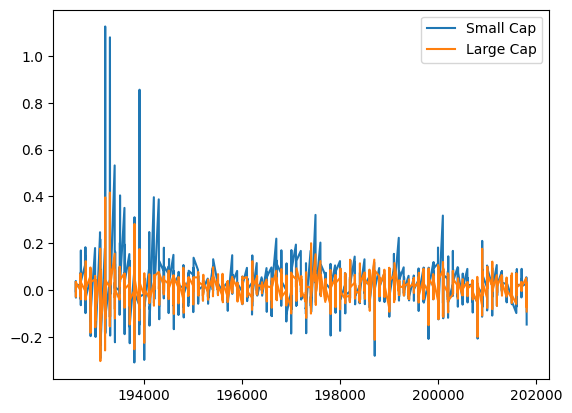

In [ ]:
task_me = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, na_values=-99.99)
task_me.head()
rets2 = task_me[['Lo 20', 'Hi 20']]
rets2.columns = ['Small Cap', 'Large Cap']
rets2 = rets2 / 100
rets2.plot.line()

# To calculate the Annualized Return of the Lo 20 portfolio over the entire period, you can add the following code:
n_months = rets2.shape[0]
total_return_lo20 = (rets2['Large Cap'] + 1).prod() - 1
annualized_return_lo20 = (1 + total_return_lo20)**(12 / n_months) - 1
print(f"Annualized Return of the Lo 20 portfolio: {annualized_return_lo20:.6f}")

# Filter the data for the years 1999 to 2015
filtered_rets2 = rets2.loc["1999":"2015"]

# Calculate the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the Small Cap (Lo 20) portfolio
drawdown_result = t.drawdown(filtered_rets2['Large Cap'])
print("Available columns in drawdown result:", drawdown_result.columns.tolist())

if 'Drawdown' in drawdown_result.columns:
    max_drawdown = drawdown_result['Drawdown'].min()
    print(f"Max Drawdown (as a positive number): {-max_drawdown:.6f}")
    
    # Find the date when the maximum drawdown occurred
    max_drawdown_date = drawdown_result['Drawdown'].idxmin()
    print(f"Maximum drawdown occurred at the end of: {max_drawdown_date}")
    
else:
    print("Error: 'Drawdown' column not found in the drawdown result.")
    print("Available columns:", drawdown_result.columns.tolist())

In [ ]:
# --- PART 1: PORTFOLIO ANALYSIS (SmallCap vs LargeCap) ---

# Load the portfolio data and parse dates correctly from the start

me_data = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                      header=0, 
                      index_col=0, 
                      na_values=[-99.99],  
                      parse_dates=True)
me_data.index = pd.to_datetime(me_data.index, format='%Y%m').to_period('M')


# Select Lo 20 and Hi 20 columns, rename, and convert to returns
portfolios = me_data[['Lo 20', 'Hi 20']]
portfolios.columns = ['SmallCap', 'LargeCap']
portfolios = portfolios / 100

print("\n--- QUESTIONS 1-4: ANALYSIS FOR THE ENTIRE PERIOD ---")
n_months_total = portfolios.shape[0]

# Annualized returns and volatilities (entire period)
ann_returns_total = (portfolios + 1).prod()**(12/n_months_total) - 1
ann_vol_total = portfolios.std() * np.sqrt(12)

print(f"Q1. Annualized Return SmallCap: {ann_returns_total['SmallCap']*100:.2f}%")
print(f"Q2. Annualized Volatility SmallCap: {ann_vol_total['SmallCap']*100:.2f}%")
print(f"Q3. Annualized Return LargeCap: {ann_returns_total['LargeCap']*100:.2f}%")
print(f"Q4. Annualized Volatility LargeCap: {ann_vol_total['LargeCap']*100:.2f}%")


print("\n--- QUESTIONS 5-12: ANALYSIS FOR THE 1999-2015 PERIOD ---")

# Correctly filter for the 1999-2015 period
portfolios_filtered = portfolios.loc["1999":"2015"]
n_months_filtered = portfolios_filtered.shape[0]

# Annualized returns and volatilities (1999-2015)
ann_returns_filtered = (portfolios_filtered + 1).prod()**(12/n_months_filtered) - 1
ann_vol_filtered = portfolios_filtered.std() * np.sqrt(12)

print(f"Q5. Annualized Return SmallCap (1999-2015): {ann_returns_filtered['SmallCap']*100:.2f}%")
print(f"Q6. Annualized Volatility SmallCap (1999-2015): {ann_vol_filtered['SmallCap']*100:.2f}%")
print(f"Q7. Annualized Return LargeCap (1999-2015): {ann_returns_filtered['LargeCap']*100:.2f}%")
print(f"Q8. Annualized Volatility LargeCap (1999-2015): {ann_vol_filtered['LargeCap']*100:.2f}%")

# Drawdown Analysis (1999-2015)
dd_smallcap = t.drawdown(portfolios_filtered['SmallCap'])
max_dd_smallcap_val = dd_smallcap['Drawdown'].min()
max_dd_smallcap_date = dd_smallcap['Drawdown'].idxmin()

dd_largecap = t.drawdown(portfolios_filtered['LargeCap'])
max_dd_largecap_val = dd_largecap['Drawdown'].min()
max_dd_largecap_date = dd_largecap['Drawdown'].idxmin()

print(f"\nQ9. Max Drawdown SmallCap (1999-2015): {-max_dd_smallcap_val*100:.2f}%")
print(f"Q10. Max Drawdown SmallCap occurred in: {max_dd_smallcap_date}")
print(f"Q11. Max Drawdown LargeCap (1999-2015): {-max_dd_largecap_val*100:.2f}%")
print(f"Q12. Max Drawdown LargeCap occurred in: {max_dd_largecap_date}")


print("\n--- QUESTIONS 13-16: HEDGE FUND ANALYSIS ---")

# Load hedge fund data 
hfi = pd.read_csv("findata/edhec-hedgefundindices.csv",  
                  header=0, 
                  index_col=0, 
                  parse_dates=True)
hfi = hfi / 100

# Semideviation analysis for 2009-2018
hfi_2009_2018 = hfi.loc["2009":"2018"]
semidev_results = hfi_2009_2018.aggregate(t.semideviation)
print(f"\nQ13. Highest semideviation (2009-2018): {semidev_results.idxmax()}")
print(f"Q14. Lowest semideviation (2009-2018): {semidev_results.idxmin()}")

# Skewness analysis for 2009-2018
skew_2009_2018 = hfi_2009_2018.aggregate(t.skewness)
print(f"\nQ15. Most negatively skewed fund (2009-2018): {skew_2009_2018.idxmin()}")

# Kurtosis analysis for 2000-2018
hfi_2000_2018 = hfi.loc["2000":"2018"]
kurtosis_2000_2018 = hfi_2000_2018.aggregate(t.kurtosis)
print(f"\nQ16. Highest kurtosis fund (2000-2018): {kurtosis_2000_2018.idxmax()}")

print("\n" + "="*60)


--- QUESTIONS 1-4: ANALYSIS FOR THE ENTIRE PERIOD ---
Q1. Annualized Return SmallCap: 15.20%
Q2. Annualized Volatility SmallCap: 33.67%
Q3. Annualized Return LargeCap: 9.85%
Q4. Annualized Volatility LargeCap: 19.51%

--- QUESTIONS 5-12: ANALYSIS FOR THE 1999-2015 PERIOD ---
Q5. Annualized Return SmallCap (1999-2015): 11.44%
Q6. Annualized Volatility SmallCap (1999-2015): 22.89%
Q7. Annualized Return LargeCap (1999-2015): 6.29%
Q8. Annualized Volatility LargeCap (1999-2015): 17.27%

Q9. Max Drawdown SmallCap (1999-2015): 62.48%
Q10. Max Drawdown SmallCap occurred in: 2009-02
Q11. Max Drawdown LargeCap (1999-2015): 55.27%
Q12. Max Drawdown LargeCap occurred in: 2009-02

--- QUESTIONS 13-16: HEDGE FUND ANALYSIS ---

Q13. Highest semideviation (2009-2018): Short Selling
Q14. Lowest semideviation (2009-2018): Fixed Income Arbitrage

Q15. Most negatively skewed fund (2009-2018): Equity Market Neutral

Q16. Highest kurtosis fund (2000-2018): Fixed Income Arbitrage



C:\Users\2r\AppData\Local\Temp\ipykernel_12552\1834477096.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_data = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
C:\Users\2r\AppData\Local\Temp\ipykernel_12552\1834477096.py:64: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("findata/edhec-hedgefundindices.csv",


### Part 1: SmallCap vs. LargeCap Portfolio Analysis (Q1-12)

This section analyzes two distinct stock portfolios: the 20% of stocks with the lowest market capitalization (**SmallCap**) and the 20% with the highest (**LargeCap**). The goal is to quantify and compare their performance and risk over different time horizons.

#### **Annualized Return & Volatility (Q1-8)**
The first metrics we calculate are the fundamental measures of performance and risk.

* **Annualized Return** : This isn't a simple average. It's the geometric average return, which tells you the **compounded annual growth rate** of the portfolio.
    * **In the code:** The line `(portfolios + 1).prod()**(12/n_months) - 1` first compounds all monthly returns together with `.prod()` and then converts that total growth into an equivalent average yearly rate.

* **Annualized Volatility** : This is the annualized **standard deviation** of returns. It measures how much the portfolio's value fluctuated around its average—it's the classic measure of **risk**. A higher number means a "bumpier ride."
    * **In the code:** We calculate the monthly standard deviation with `portfolios.std()` and then multiply by `np.sqrt(12)`. This scaling is done because variance grows linearly with time, so standard deviation (its square root) grows with the square root of time.

#### **Maximum Drawdown (Q9-12)**
This metric answers a critical question for any investor: *"What's the most money I could have possibly lost?"*

* **Maximum Drawdown** : This is the **largest single drop from a peak to a bottom** in the portfolio's value. It's a measure of worst-case downside risk and can be a better indicator of the potential for pain than volatility. 
    * **In the code:** The custom function `t.drawdown()` calculates the percentage loss from the last peak for every point in time. We then use `.min()` to find the largest of these drops (since losses are negative).

---

### Part 2: Hedge Fund Risk Analysis (Q13-16)

This section shifts to a dataset of hedge fund indices. Since hedge funds often have complex strategies, their returns may not follow a normal distribution. Therefore, we use more advanced metrics to understand the *nature* of their risk.

#### **Semideviation (Q13-14)**
Standard deviation punishes both upside and downside volatility equally, but investors love upside surprises!

* **Semideviation**: This is a measure of **downside volatility only**. It's calculated like standard deviation but only uses returns that fall below the average.
    * **In the code:** The `t.semideviation` function is applied to find this "bad" volatility. The fund with the **lowest semideviation** is the most consistent at protecting against losses.

#### **Skewness (Q15)**
This tells us about the symmetry of the returns.

* **Skewness** : Measures if the return distribution has a longer "tail" on one side.
    * **Negative Skew**: Implies frequent small gains and a few large, unexpected losses. This is an undesirable trait, sometimes called "picking up pennies in front of a steamroller."
    * **In the code:** We look for the `.idxmin()` of the skewness results to find the fund with the **most negative skew**, as it represents the highest risk of a sudden, large crash.

#### **Kurtosis (Q16)**
This measures the "tailedness" of the return distribution.

* **Kurtosis**: This is a measure of **extreme event risk**, or "tail risk."
    * **High Kurtosis**: Means the distribution has "fat tails." This indicates a greater-than-normal probability of experiencing extreme outcomes (both massive gains and massive losses). It's a measure of "black swan" risk.